# CIFAR-10 Model

In [29]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, BatchNormalization, Dense, Dropout, Flatten

# Load & Prepare Dataset

In [30]:
# Load the CIFAR-10 dataset
cifar = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar.load_data()
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (50000, 32, 32, 3)
y_train Shape: (50000, 1)
X_test Shape: (10000, 32, 32, 3)
y_test Shape: (10000, 1)


In [31]:
# Flatten y_train and y_test
y_train, y_test = y_train.flatten(), y_test.flatten()
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

y_train Shape: (50000,)
y_test Shape: (10000,)


In [32]:
# Get the Data Range
print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

Min: 0
Max: 255


In [33]:
# Normalize the data (center it between 0 and 1)
X_train = X_train/(255)
X_test = X_test/(255)
print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

Min: 0.0
Max: 1.0


In [34]:
# Get the number of output classes
K = len(np.unique(y_train))
print("Number of Output Classes:", K)

Number of Output Classes: 10


In [35]:
# Output Labels (from CIFAR-10 Documention)
labels = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

# Inspect the Data

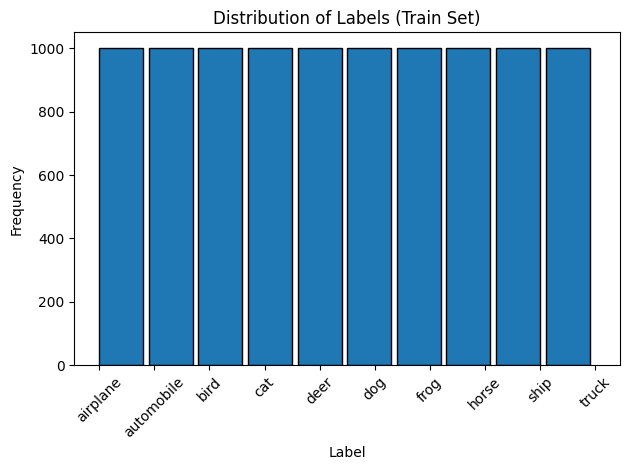

In [36]:
# Plot Distribution of Labels
plt.hist(y_test, bins=K, edgecolor='black', width=0.8, )
plt.title('Distribution of Labels (Train Set)')
plt.xlabel('Label')
plt.xticks(range(len(labels)), labels, rotation=45)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

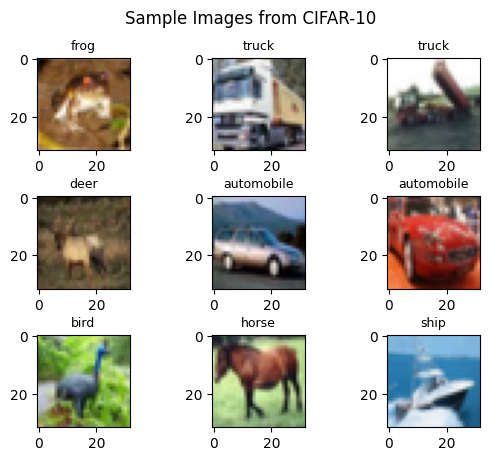

In [37]:
# Output sample images
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.title(labels[y_train[i]], fontsize=9)
plt.suptitle("Sample Images from CIFAR-10")
plt.subplots_adjust(hspace=0.5)

# Build the Model

In [38]:
# Input Layer
i = Input(shape=(32, 32, 3))

# Round #1 of Convolution
x = Conv2D(32, kernel_size=(2, 2), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, kernel_size=(2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Round #2 of Convolution
x = Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Round #3 of Convolution
x = Conv2D(128, kernel_size=(2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, kernel_size=(2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# Dense Network for Classification
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

# Declare the model
model = Model(i, x)

In [39]:
# Compile the Model
model.compile(
    optimizer = 'sgd',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [40]:
# Fit the Model using Data Augmentation
batch_size = 32
steps_per_epoch = len(X_train) // batch_size

# Declare the Training Generator (with its params)
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    rotation_range= 10,
    horizontal_flip = True
)

# Fit the Model using the Training Generator
r = model.fit(
    data_generator.flow(X_train, y_train, batch_size),
    validation_data=(X_test, y_test),
    steps_per_epoch=steps_per_epoch,
    epochs=50
)

Epoch 1/50
1562/1562 [==============================] - 43s 26ms/step - loss: 1.5909 - accuracy: 0.4350 - val_loss: 1.3541 - val_accuracy: 0.5099
Epoch 2/50
1562/1562 [==============================] - 39s 25ms/step - loss: 1.2364 - accuracy: 0.5552 - val_loss: 1.1208 - val_accuracy: 0.5934
Epoch 3/50
1562/1562 [==============================] - 44s 28ms/step - loss: 1.0938 - accuracy: 0.6076 - val_loss: 1.0451 - val_accuracy: 0.6268
Epoch 4/50
1562/1562 [==============================] - 40s 25ms/step - loss: 1.0036 - accuracy: 0.6424 - val_loss: 1.0665 - val_accuracy: 0.6291
Epoch 5/50
1562/1562 [==============================] - 43s 28ms/step - loss: 0.9359 - accuracy: 0.6665 - val_loss: 0.9081 - val_accuracy: 0.6838
Epoch 6/50
1562/1562 [==============================] - 41s 26ms/step - loss: 0.8769 - accuracy: 0.6884 - val_loss: 0.8447 - val_accuracy: 0.7092
Epoch 7/50
1562/1562 [==============================] - 43s 28ms/step - loss: 0.8259 - accuracy: 0.7091 - val_loss: 0.8236 -

Text(0.5, 1.0, 'Loss per Iteration')

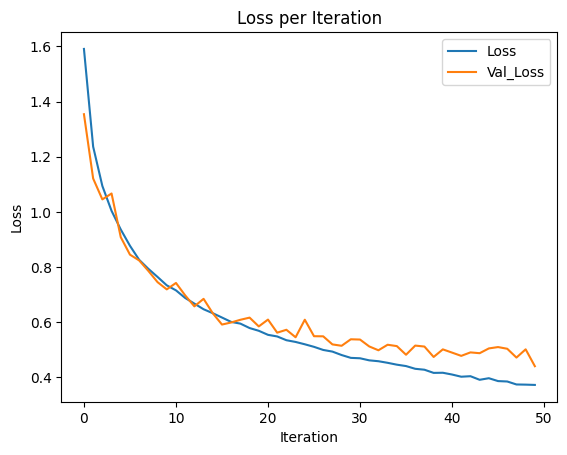

In [41]:
# Plot the Loss per Iteration
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss per Iteration')

Text(0.5, 1.0, 'Accuracy per Iteration')

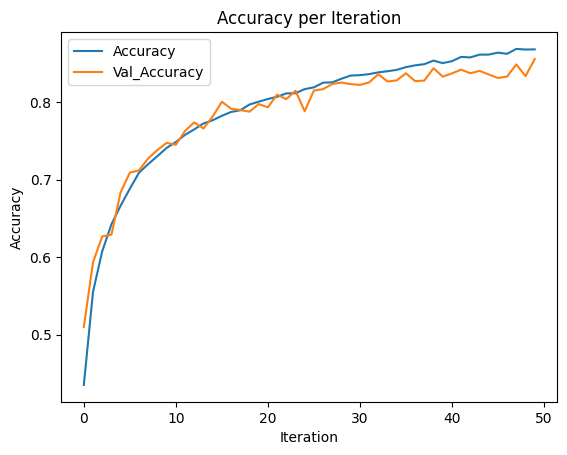

In [42]:
# Plot the Accuracy per Iteration
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy per Iteration')

In [51]:
# Print Model Summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        416       
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0   

# Results

In [60]:
# Print Final Test Accuracy
val_loss, val_acc = model.evaluate(X_test, y_test)
print('Final Validation Loss: %s' % val_loss)
print('Final Validation Accuracy: %s' % val_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.4400 - accuracy: 0.8559
Final Validation Loss: 0.43998369574546814
Final Validation Accuracy: 0.85589998960495


313/313 [==============================] - 1s 4ms/step


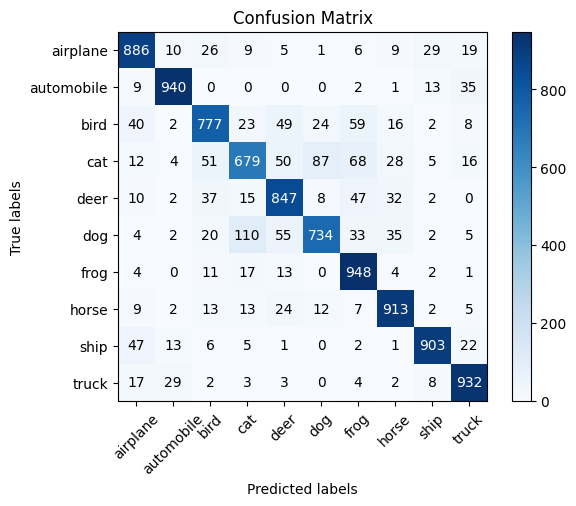

In [61]:
# Plot Confusion Matrix
y_pred = model.predict(X_test).argmax(axis=1).flatten()
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using matplotlib
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Annotate the cells with the counts
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

Text(0.5, 1.0, 'Actual Label: cat - Predicted Label: cat')

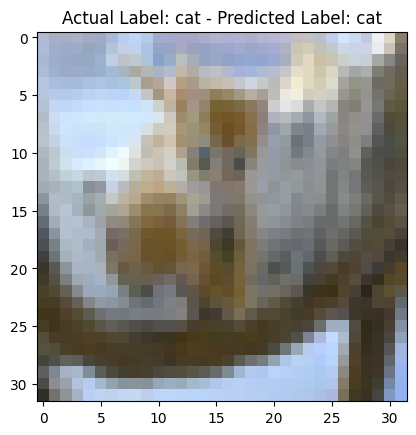

In [62]:
# Example of Correct Prediction
idx = np.where(y_pred == y_test)[0]
i = np.random.choice(idx)

plt.imshow(X_test[i], cmap='gray')
plt.title("Actual Label: %s - Predicted Label: %s" % (labels[y_test[i]], labels[y_pred[i]]))

Text(0.5, 1.0, 'Actual Label: deer - Predicted Label: dog')

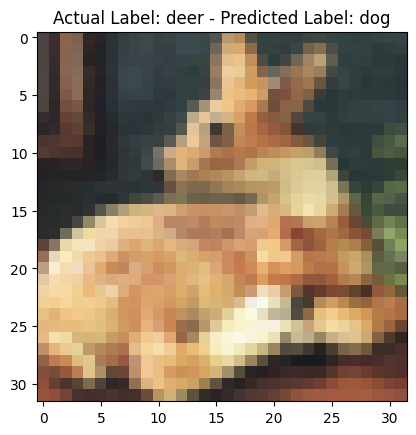

In [63]:
# Examples of Missclassifctions
idx = np.where(y_pred != y_test)[0]
i = np.random.choice(idx)

plt.imshow(X_test[i], cmap='gray')
plt.title("Actual Label: %s - Predicted Label: %s" % (labels[y_test[i]], labels[y_pred[i]]))

# Saving the Model

In [52]:
# Save the Model
model.save('cifar-10-classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
# Check if the Model was Saved
!ls

cifar-10-classifier.h5	sample_data
